Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [139]:
import pandas as pd

# Read the three CSV files into DataFrames
df1 = pd.read_csv('fsq_df.csv')
df2 = pd.read_csv('yelp_venues_df.csv')
df3 = pd.read_csv('bikestations_df.csv')

# Merge the two dataframes based on the 'station_id' column
merged_df = pd.merge(df1, df2, on='station_id')
merged_df = pd.merge(merged_df, df3, on='station_id')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)


PermissionError: [Errno 13] Permission denied: 'merged_file.csv'

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [140]:
merged_df

,station_id,restaurant_address,name_x,distance_to_station,venue_type_x,name_y,address,venue_type_y,distance,rating,review_count,available_bikes,latitude,longitude,LL
0,fb337bbed72e2be090071e199899b2be,5 Hastings Ave,Hasting Snack Bar,759,"Lounge, Comfort Food Restaurant, Fast Food Res...",KaSpace Cafe,1183 Queen Street E,Vegetarian,1023.018862,5.0,9,3,43.665269,-79.319796,"43.665269,-79.319796"
1,4ff88d5880e71aa40d34cfe5d09b0ca7,1311 Saint Clair Ave W,Tre Mari Bakery,603,"Bakery, Deli",Slice Of Toronto,968 St. Clair Avenue W,Pizza,1185.071383,5.0,5,7,43.671420,-79.445947,"43.67142,-79.445947"
2,a09c67c0b419654d907c9134b108e328,5 Hastings Ave,Hasting Snack Bar,950,"Lounge, Comfort Food Restaurant, Fast Food Res...",Le Conciliabule,1300 Gerrard Street E,Bakeries,956.331208,4.5,13,2,43.666224,-79.317693,"43.666224,-79.317693"
3,d6a9daee68070a8b106cfb598d81308c,1 Richmond St W,Richmond Station,276,American Restaurant,Adobar,200 Dundas St E,Filipino,508.773246,5.0,5,1,43.653236,-79.376716,"43.653236,-79.376716"
4,8f8af40d9388c8a3962559e8681d3db7,580 Church St,Storm Crow Manor,362,"Bar, Theme Restaurant",Adobar,200 Dundas St E,Filipino,863.804930,5.0,5,5,43.663722,-79.380288,"43.663722,-79.380288"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4a5734eee8c1c49197ffe9b992dd032a,11 Duncan St,Byblos,529,Mediterranean Restaurant,LosCo,111 Richmond Street W,Mexican,1009.433138,5.0,5,13,43.644070,-79.392900,"43.64407,-79.3929"
246,ad299c229e85bba5b84af14933cfac77,2415B Lake Shore Blvd Wes,Birds and Beans Cafe,558,"Café, Coffee Shop, Fast Food Restaurant",Tadka - Sizzling Indian Spices,666 The Queensway,Indian,1359.301217,5.0,13,14,43.618680,-79.486740,"43.61868,-79.48674"
247,41466727730d71a0286376ef3675d282,11 Duncan St,Byblos,374,Mediterranean Restaurant,LosCo,111 Richmond Street W,Mexican,730.916320,5.0,5,12,43.644200,-79.387020,"43.6442,-79.38702"
248,213541646a587196b1acb812a3d0a8ad,11 Duncan St,Byblos,613,Mediterranean Restaurant,LosCo,111 Richmond Street W,Mexican,837.705044,5.0,5,11,43.642830,-79.384090,"43.64283,-79.38409"


In [138]:
merged_df.to_csv('merged_df.csv', index=False)

In [21]:
# find the restaurant w/ the closest distance to the shared station id and create new df with th only the closer restaurants

# Create a copy of the original DataFrame
closer_df = merged_df.copy()

# Create a new column 'closer_restaurant' with the name of the restaurant with the shorter distance
closer_df['closer_restaurant'] = closer_df.apply(lambda row: row['name_x'] if row['distance'] < row['distance_to_station'] else row['name_y'], axis=1)

# Create a new column 'distance' with the shorter distance value
closer_df['distance'] = closer_df.apply(lambda row: row['distance'] if row['distance'] < row['distance_to_station'] else row['distance_to_station'], axis=1)

# Create a new column 'venue_type' with the corresponding venue type
closer_df['venue_type'] = closer_df.apply(lambda row: row['venue_type_x'] if row['distance'] < row['distance_to_station'] else row['venue_type_y'], axis=1)



# Create a new DataFrame with the selected columns
closer_venue_df = closer_df[['station_id', 'closer_restaurant', 'distance', 'venue_type' ]]

# Display the new DataFrame
print(closer_venue_df)


                           station_id               closer_restaurant  \
0    fb337bbed72e2be090071e199899b2be                    KaSpace Cafe   
1    4ff88d5880e71aa40d34cfe5d09b0ca7                Slice Of Toronto   
2    a09c67c0b419654d907c9134b108e328                 Le Conciliabule   
3    d6a9daee68070a8b106cfb598d81308c                          Adobar   
4    8f8af40d9388c8a3962559e8681d3db7                          Adobar   
..                                ...                             ...   
245  4a5734eee8c1c49197ffe9b992dd032a                           LosCo   
246  ad299c229e85bba5b84af14933cfac77  Tadka - Sizzling Indian Spices   
247  41466727730d71a0286376ef3675d282                           LosCo   
248  213541646a587196b1acb812a3d0a8ad                           LosCo   
249  1a68bd75d5159c7cc33367b97ee8ab8e       Bread & Roses Bakery Cafe   

       distance                       venue_type  
0    759.000000                       Vegetarian  
1    603.000000      

In [22]:
# Create a new DataFrame with the selected columns
closer_venue_df = closer_df[['station_id', 'closer_restaurant', 'distance', 'venue_type', 'available_bikes']]

# Display the new DataFrame
print(closer_venue_df)


                           station_id               closer_restaurant  \
0    fb337bbed72e2be090071e199899b2be                    KaSpace Cafe   
1    4ff88d5880e71aa40d34cfe5d09b0ca7                Slice Of Toronto   
2    a09c67c0b419654d907c9134b108e328                 Le Conciliabule   
3    d6a9daee68070a8b106cfb598d81308c                          Adobar   
4    8f8af40d9388c8a3962559e8681d3db7                          Adobar   
..                                ...                             ...   
245  4a5734eee8c1c49197ffe9b992dd032a                           LosCo   
246  ad299c229e85bba5b84af14933cfac77  Tadka - Sizzling Indian Spices   
247  41466727730d71a0286376ef3675d282                           LosCo   
248  213541646a587196b1acb812a3d0a8ad                           LosCo   
249  1a68bd75d5159c7cc33367b97ee8ab8e       Bread & Roses Bakery Cafe   

       distance                       venue_type  available_bikes  
0    759.000000                       Vegetarian       

In [55]:
closer_df

,station_id,restaurant_address,name_x,distance_to_station,venue_type_x,name_y,address,venue_type_y,distance,rating,review_count,available_bikes,latitude,longitude,LL,closer_restaurant,venue_type
0,fb337bbed72e2be090071e199899b2be,5 Hastings Ave,Hasting Snack Bar,759,"Lounge, Comfort Food Restaurant, Fast Food Res...",KaSpace Cafe,1183 Queen Street E,Vegetarian,759.000000,5.0,9,3,43.665269,-79.319796,"43.665269,-79.319796",KaSpace Cafe,Vegetarian
1,4ff88d5880e71aa40d34cfe5d09b0ca7,1311 Saint Clair Ave W,Tre Mari Bakery,603,"Bakery, Deli",Slice Of Toronto,968 St. Clair Avenue W,Pizza,603.000000,5.0,5,7,43.671420,-79.445947,"43.67142,-79.445947",Slice Of Toronto,Pizza
2,a09c67c0b419654d907c9134b108e328,5 Hastings Ave,Hasting Snack Bar,950,"Lounge, Comfort Food Restaurant, Fast Food Res...",Le Conciliabule,1300 Gerrard Street E,Bakeries,950.000000,4.5,13,2,43.666224,-79.317693,"43.666224,-79.317693",Le Conciliabule,Bakeries
3,d6a9daee68070a8b106cfb598d81308c,1 Richmond St W,Richmond Station,276,American Restaurant,Adobar,200 Dundas St E,Filipino,276.000000,5.0,5,1,43.653236,-79.376716,"43.653236,-79.376716",Adobar,Filipino
4,8f8af40d9388c8a3962559e8681d3db7,580 Church St,Storm Crow Manor,362,"Bar, Theme Restaurant",Adobar,200 Dundas St E,Filipino,362.000000,5.0,5,5,43.663722,-79.380288,"43.663722,-79.380288",Adobar,Filipino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4a5734eee8c1c49197ffe9b992dd032a,11 Duncan St,Byblos,529,Mediterranean Restaurant,LosCo,111 Richmond Street W,Mexican,529.000000,5.0,5,13,43.644070,-79.392900,"43.64407,-79.3929",LosCo,Mexican
246,ad299c229e85bba5b84af14933cfac77,2415B Lake Shore Blvd Wes,Birds and Beans Cafe,558,"Café, Coffee Shop, Fast Food Restaurant",Tadka - Sizzling Indian Spices,666 The Queensway,Indian,558.000000,5.0,13,14,43.618680,-79.486740,"43.61868,-79.48674",Tadka - Sizzling Indian Spices,Indian
247,41466727730d71a0286376ef3675d282,11 Duncan St,Byblos,374,Mediterranean Restaurant,LosCo,111 Richmond Street W,Mexican,374.000000,5.0,5,12,43.644200,-79.387020,"43.6442,-79.38702",LosCo,Mexican
248,213541646a587196b1acb812a3d0a8ad,11 Duncan St,Byblos,613,Mediterranean Restaurant,LosCo,111 Richmond Street W,Mexican,613.000000,5.0,5,11,43.642830,-79.384090,"43.64283,-79.38409",LosCo,Mexican


In [18]:
#check for duplicate names in closer_venues_df
namessUnique = len(set(closer_venue_df.closer_restaurant))
namesTotal = closer_venue_df.shape[0]
idsdupe = namesTotal - namessUnique
print(idsdupe)

165


In [ ]:
# there are 165 duplicate restaurant in the closer_venues_df but many stations close to each other 

In [43]:
# find the restaurant w/ the farther distance to the shared station id and create new df with th only the father restaurants

# Create a copy of the original DataFrame
far_df = merged_df.copy()

# Create a new column 'closer_restaurant' with the name of the restaurant with the shorter distance
far_df['further_restaurant'] = far_df.apply(lambda row: row['name_x'] if row['distance'] > row['distance_to_station'] else row['name_y'], axis=1)

# Create a new column 'distance' with the shorter distance value
far_df['distance'] = far_df.apply(lambda row: row['distance'] if row['distance'] > row['distance_to_station'] else row['distance_to_station'], axis=1)

# Create a new column 'venue_type' with the corresponding venue type
far_df['venue_type'] = far_df.apply(lambda row: row['venue_type_x'] if row['distance'] > row['distance_to_station'] else row['venue_type_y'], axis=1)



# Create a new DataFrame with the selected columns
far_venue_df = far_df[['station_id', 'further_restaurant', 'distance', 'venue_type' ]]

# Display the new DataFrame
print(far_venue_df)


                           station_id    further_restaurant     distance  \
0    fb337bbed72e2be090071e199899b2be     Hasting Snack Bar  1023.018862   
1    4ff88d5880e71aa40d34cfe5d09b0ca7       Tre Mari Bakery  1185.071383   
2    a09c67c0b419654d907c9134b108e328     Hasting Snack Bar   956.331208   
3    d6a9daee68070a8b106cfb598d81308c      Richmond Station   508.773246   
4    8f8af40d9388c8a3962559e8681d3db7      Storm Crow Manor   863.804930   
..                                ...                   ...          ...   
245  4a5734eee8c1c49197ffe9b992dd032a                Byblos  1009.433138   
246  ad299c229e85bba5b84af14933cfac77  Birds and Beans Cafe  1359.301217   
247  41466727730d71a0286376ef3675d282                Byblos   730.916320   
248  213541646a587196b1acb812a3d0a8ad                Byblos   837.705044   
249  1a68bd75d5159c7cc33367b97ee8ab8e           Bello Pizza   208.000000   

                                            venue_type  
0    Lounge, Comfort Food Rest

In [56]:
import pandas as pd

# Assuming you have the closer_venue_df and far_venue_df dataframes

# Add the 'available_bikes' column to closer_venue_df
closer_venue_df['available_bikes'] = closer_df['available_bikes'].values

# Add the 'available_bikes' column to far_venue_df
far_venue_df['available_bikes'] = closer_df['available_bikes'].values

# Assuming you have the closer_venue_df and far_df dataframes
# Create copies of the dataframes
closer_venue_df_copy = closer_df.copy()
far_venue_df_copy = far_venue_df.copy()

# Rename the columns in the copied dataframes to match the columns in far_df
closer_venue_df_copy.rename(columns={'closer_restaurant': 'name'}, inplace=True)
far_venue_df_copy.rename(columns={'further_restaurant': 'name'}, inplace=True)

# Reorder the columns in closer_venue_df_copy to match the columns in far_df
closer_venue_df_copy = closer_venue_df_copy[['station_id', 'name', 'distance', 'venue_type', 'available_bikes']]

# Add the 'free_bikes' column to far_venue_df_copy
far_venue_df_copy['available_bikes'] = closer_venue_df_copy['available_bikes'].values

# Concatenate the copied dataframes vertically
combined_df = pd.concat([closer_venue_df_copy, far_venue_df_copy], axis=0)

# Reset the index of the combined dataframe
combined_df.reset_index(drop=True, inplace=True)

# Print the combined dataframe
print(combined_df)


                           station_id                  name     distance  \
0    fb337bbed72e2be090071e199899b2be          KaSpace Cafe   759.000000   
1    4ff88d5880e71aa40d34cfe5d09b0ca7      Slice Of Toronto   603.000000   
2    a09c67c0b419654d907c9134b108e328       Le Conciliabule   950.000000   
3    d6a9daee68070a8b106cfb598d81308c                Adobar   276.000000   
4    8f8af40d9388c8a3962559e8681d3db7                Adobar   362.000000   
..                                ...                   ...          ...   
495  4a5734eee8c1c49197ffe9b992dd032a                Byblos  1009.433138   
496  ad299c229e85bba5b84af14933cfac77  Birds and Beans Cafe  1359.301217   
497  41466727730d71a0286376ef3675d282                Byblos   730.916320   
498  213541646a587196b1acb812a3d0a8ad                Byblos   837.705044   
499  1a68bd75d5159c7cc33367b97ee8ab8e           Bello Pizza   208.000000   

                                  venue_type  available_bikes  
0                      

C:\Users\Admin\AppData\Local\Temp\ipykernel_20340\3186463739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  far_venue_df['available_bikes'] = closer_df['available_bikes'].values


In [57]:
print(combined_df.describe())

          distance  available_bikes
count   500.000000        500.00000
mean    697.994746          8.57200
std     288.966124          6.02307
min      32.000000          0.00000
25%     485.823009          3.00000
50%     718.500000          8.00000
75%     919.009645         13.00000
max    1381.235009         24.00000


## central tendencies for available bikes are inaccurate bec double the sample amt. for distance using ontwo ditances ber bikestation (group by bikestation

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create multivariate scatter plot with line of best fit
sns.pairplot(df, x_vars=['distance', 'rating', 'review_count', 'is_pizza', 'is_bar', 'is_Mexican', 'is_Vegetarian', 'is_Bakeries', 'is_Filipino', 'is_Indian'], y_vars=['available_bikes'], kind='reg')

# Set plot title
plt.title('Multivariate Scatter Plot with Line of Best Fit')

# Display the plot
plt.show()


NameError: name 'data' is not defined

<Axes: xlabel='available_bikes', ylabel='Count'>

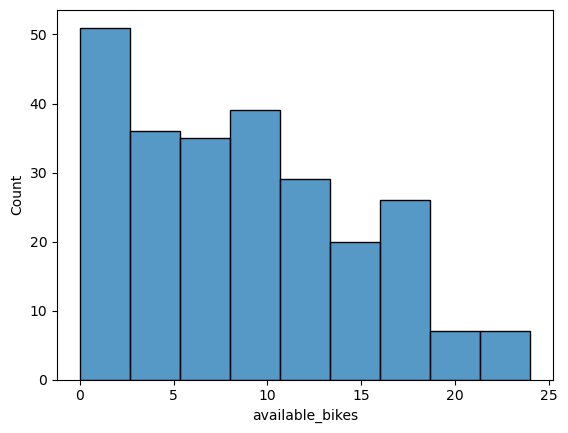

In [61]:
sns.histplot(closer_venue_df['available_bikes'])

In [103]:
import pandas as pd
import numpy as np

# Step 1: Create closer_venue_df
closest_venue_df = merged_df.copy()
closer_mask = closest_venue_df['distance_to_station'] <= closest_venue_df['distance']
closest_venue_df['address'] = np.where(closer_mask, closest_venue_df['restaurant_address'], closest_venue_df['address'])
closest_venue_df['distance'] = np.where(closer_mask, closest_venue_df['distance_to_station'], closest_venue_df['distance'])
closest_venue_df['venue_type'] = np.where(closer_mask, closest_venue_df['venue_type_y'], closest_venue_df['venue_type_x'])
closest_venue_df['name'] = np.where(closer_mask, closest_venue_df['name_x'], closest_venue_df['name_y'])

# Check if 'station_id', 'venue_type', 'distance', 'address', 'name', 'available_bikes' columns exist before selecting them
required_columns = ['station_id', 'venue_type', 'distance', 'address', 'name', 'available_bikes']
closest_venue_df = closest_venue_df[required_columns] if all(col in closest_venue_df.columns for col in required_columns) else closest_venue_df

# Step 2: Create far_venue_df
furthest_venue_df = merged_df.copy()
far_mask = furthest_venue_df['distance_to_station'] > furthest_venue_df['distance']
furthest_venue_df['address'] = np.where(far_mask, furthest_venue_df['restaurant_address'], furthest_venue_df['address'])
furthest_venue_df['distance'] = np.where(far_mask, furthest_venue_df['distance_to_station'], furthest_venue_df['distance'])
furthest_venue_df['venue_type'] = np.where(far_mask, furthest_venue_df['venue_type_y'], furthest_venue_df['venue_type_x'])
furthest_venue_df['name'] = np.where(far_mask, furthest_venue_df['name_x'], furthest_venue_df['name_y'])

# Check if 'station_id', 'venue_type', 'distance', 'address', 'name', 'available_bikes' columns exist before selecting them
required_columns = ['station_id', 'venue_type', 'distance', 'address', 'name', 'available_bikes']
furthest_venue_df = furthest_venue_df[required_columns] if all(col in furthest_venue_df.columns for col in required_columns) else furthest_venue_df

# Step 3: Concatenate closer_venue_df and far_venue_df
combined_df = pd.concat([closest_venue_df, furthest_venue_df])

# Merge 'available_bikes' column to combined_df
combined_df = combined_df.merge(merged_df[['station_id', 'available_bikes']], on='station_id', how='left')


In [104]:
combined_df

,station_id,venue_type,distance,address,name,available_bikes_x,available_bikes_y
0,fb337bbed72e2be090071e199899b2be,Vegetarian,759.000000,5 Hastings Ave,Hasting Snack Bar,3,3
1,4ff88d5880e71aa40d34cfe5d09b0ca7,Pizza,603.000000,1311 Saint Clair Ave W,Tre Mari Bakery,7,7
2,a09c67c0b419654d907c9134b108e328,Bakeries,950.000000,5 Hastings Ave,Hasting Snack Bar,2,2
3,d6a9daee68070a8b106cfb598d81308c,Filipino,276.000000,1 Richmond St W,Richmond Station,1,1
4,8f8af40d9388c8a3962559e8681d3db7,Filipino,362.000000,580 Church St,Storm Crow Manor,5,5
...,...,...,...,...,...,...,...
495,4a5734eee8c1c49197ffe9b992dd032a,Mediterranean Restaurant,1009.433138,111 Richmond Street W,LosCo,13,13
496,ad299c229e85bba5b84af14933cfac77,"Café, Coffee Shop, Fast Food Restaurant",1359.301217,666 The Queensway,Tadka - Sizzling Indian Spices,14,14
497,41466727730d71a0286376ef3675d282,Mediterranean Restaurant,730.916320,111 Richmond Street W,LosCo,12,12
498,213541646a587196b1acb812a3d0a8ad,Mediterranean Restaurant,837.705044,111 Richmond Street W,LosCo,11,11


In [106]:
combined_df.to_csv('combined_df.csv', index=False)


In [79]:
#find details abt outlier
distance_outlier_df = combined_df[(combined_df['distance'] > 800) & (combined_df['distance'] < 1000)][['distance', 'name', 'address', 'venue_type']]
print(distance_outlier_df)

       distance                            name                address  \
2    950.000000               Hasting Snack Bar         5 Hastings Ave   
7    888.000000                            Rasa          196 Robert St   
13   842.000000                White Lily Diner         678 Queen St E   
17   817.000000  Descendant Detroit Style Pizza        1168 Queen St E   
19   853.683781                  The MoMo House    679 Danforth Avenue   
..          ...                             ...                    ...   
236  866.000000                White Lily Diner         678 Queen St E   
240  982.383454                    Hot Pot Cafe   2134 Danforth Avenue   
242  855.000000                           Campo            244 Jane St   
244  995.000000                   Honest Weight       2766 Dundas St W   
248  837.705044                           LosCo  111 Richmond Street W   

                         venue_type  
2                          Bakeries  
7                             Cafes

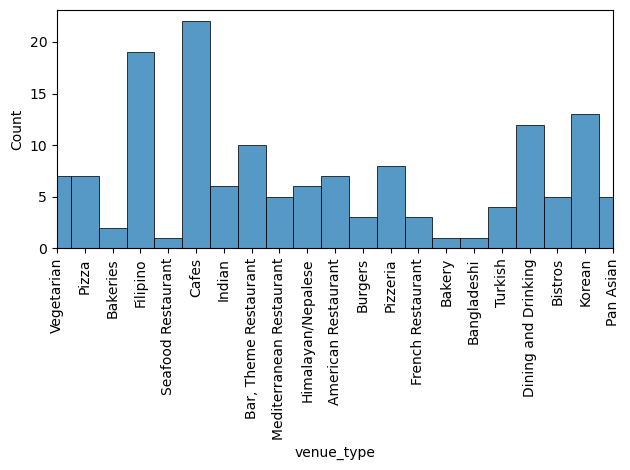

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(closest_venue_df['venue_type'])
plt.xlim(left=0, right=20)  # Adjust the values as per your desired range

plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()



<Axes: xlabel='venue_type', ylabel='Count'>

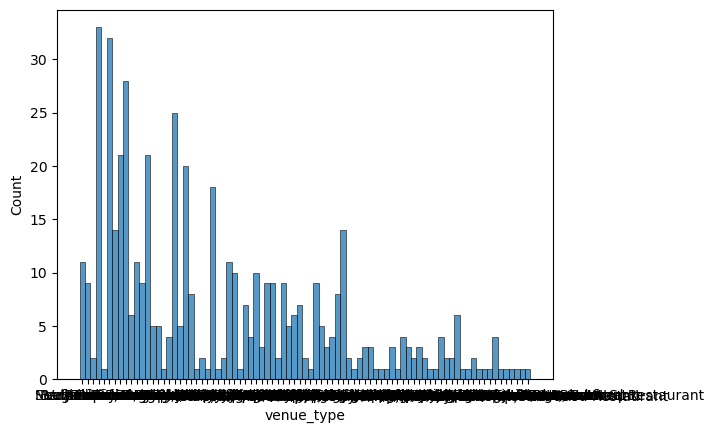

In [64]:
sns.histplot(combined_df['venue_type'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20340\3074258194.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mp = combined_df.corr() # might need to convert features to df


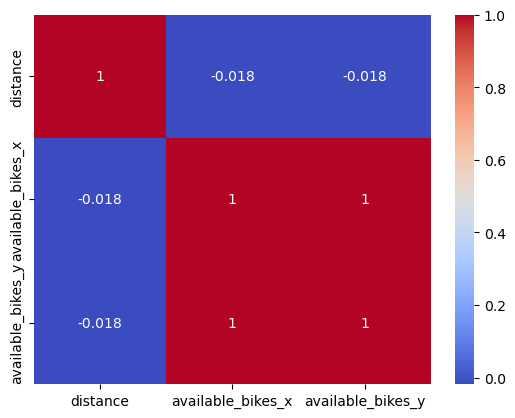

In [132]:

cor_mp = combined_df.corr() # might need to convert features to df 
sns.heatmap(cor_mp, annot=True, cmap='coolwarm')
plt.show()

In [7]:
print(merged_df.shape)

(250, 15)


In [8]:
# check for duplicates for Id
stationsUnique = len(set(merged_df.station_id))
stationsTotal = merged_df.shape[0]
idsdupe = stationsTotal - stationsUnique
print(idsdupe)

0


In [ ]:
#check for duplicate restaurant names
namesUnique= len(set(merged_df.

Text(0.5, 1.0, 'Distance to Station and Rating by Station ID')

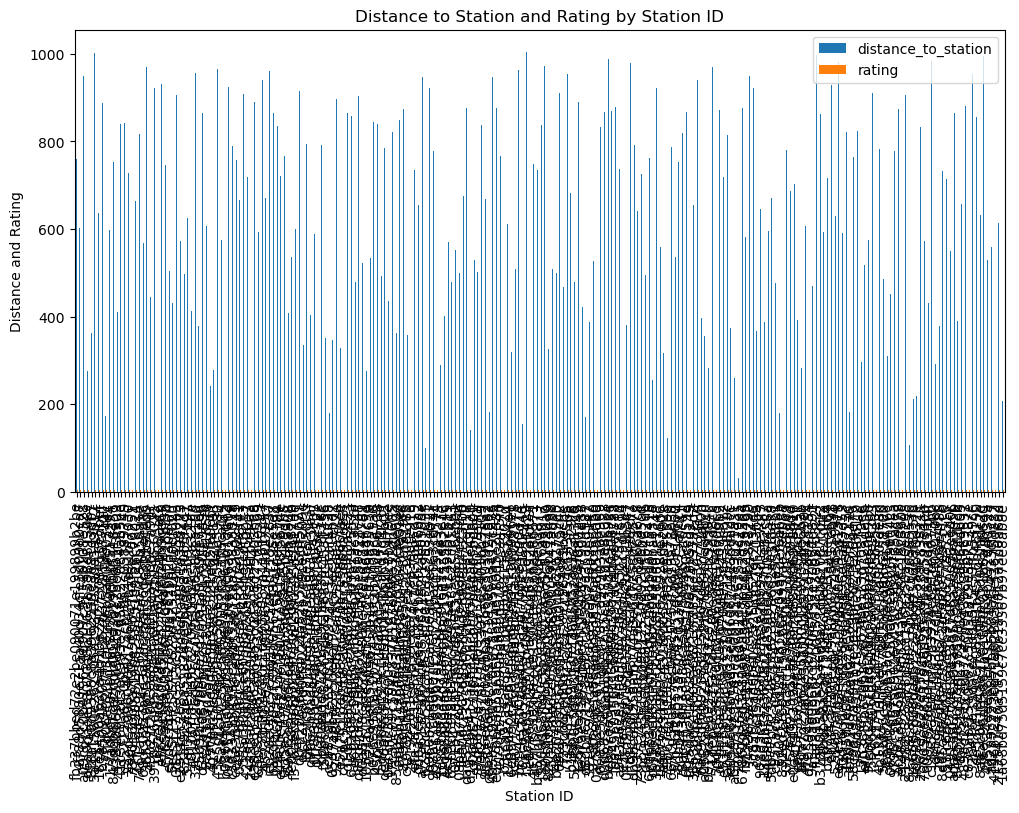

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the DataFrame
ax = merged_df.plot(kind='bar', x='station_id', y=['distance_to_station', 'rating'], figsize=(12, 6))
ax.set_xlabel('Station ID')
ax.set_ylabel('Distance and Rating')
ax.set_title('Distance to Station and Rating by Station ID')

# Save the plot as an image file
#plt.savefig('original_merged_df_plot.png')


In [27]:
descriptive_stats= merged_df.describe()
descriptive_stats

,distance_to_station,distance,rating,review_count,available_bikes,latitude,longitude
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,633.148000,762.841492,4.966000,8.052000,8.572000,43.660363,-79.390494
std,241.508891,317.124058,0.126125,5.509511,6.029114,0.015865,0.040951
min,32.000000,33.888940,4.500000,3.000000,0.000000,43.618680,-79.486740
25%,456.000000,544.698220,5.000000,5.000000,3.000000,43.649216,-79.418850
50%,655.500000,797.855376,5.000000,6.000000,8.000000,43.658877,-79.390764
75%,844.250000,987.608235,5.000000,9.000000,13.000000,43.669273,-79.366140
max,1005.000000,1381.235009,5.000000,46.000000,24.000000,43.716652,-79.281455


In [37]:
pip install imgkit

Note: you may need to restart the kernel to use updated packages.


In [40]:
descriptive_stats

,distance_to_station,distance,rating,review_count,available_bikes,latitude,longitude
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,633.148000,762.841492,4.966000,8.052000,8.572000,43.660363,-79.390494
std,241.508891,317.124058,0.126125,5.509511,6.029114,0.015865,0.040951
min,32.000000,33.888940,4.500000,3.000000,0.000000,43.618680,-79.486740
25%,456.000000,544.698220,5.000000,5.000000,3.000000,43.649216,-79.418850
50%,655.500000,797.855376,5.000000,6.000000,8.000000,43.658877,-79.390764
75%,844.250000,987.608235,5.000000,9.000000,13.000000,43.669273,-79.366140
max,1005.000000,1381.235009,5.000000,46.000000,24.000000,43.716652,-79.281455


In [136]:
import seaborn as sns
x_vars=['distance' 'station_id']
sns.scatterplot(data=combined_df,x=x_vars, y='available_bikes_y')
plt.xlablel('multivariables')
plt.ylabel('Available Bikes')
plt.title('Scatter Plot of X-Variables vs Available Bikes')
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 500 and the vector passed to `x` has length 1.

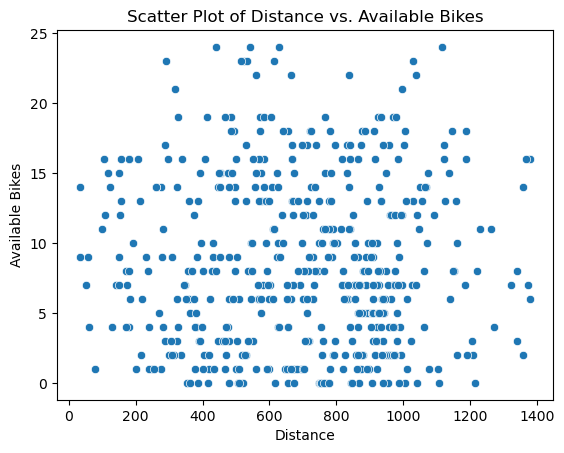

In [133]:
import seaborn as sns
sns.scatterplot(data=combined_df, x='distance', y='available_bikes_y')
plt.xlabel('Distance')
plt.ylabel('Available Bikes')
plt.title('Scatter Plot of Distance vs. Available Bikes')

# Display the plot
plt.show()


In [ ]:
#no linearity /relationship visible from visualzation b/w distance and available bikes

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [120]:
import sqlite3
import pandas as pd

# Establish a connection to an SQLite database file
conn = sqlite3.connect('C:\\Users\\Admin\\Statistical-Modelling-Projec\\databases.db')

# Load the CSV files into DataFrames
yelp_venues_df = pd.read_csv(r'C:\Users\Admin\Statistical-Modelling-Project\notebooks\yelp_venues_df.csv')
fsq_df = pd.read_csv(r'C:\Users\Admin\Statistical-Modelling-Project\notebooks\fsq_df.csv')
bikestations_df = pd.read_csv(r'C:\Users\Admin\Statistical-Modelling-Project\notebooks\bikestations_df.csv')

# Write the data from the DataFrames to SQLite tables
yelp_venues_df.to_sql('yelp_db', conn, if_exists='replace', index=False)
fsq_df.to_sql('fsq_db', conn, if_exists='replace', index=False)
bikestations_df.to_sql('bikestations_db', conn, if_exists='replace', index=False)

# Execute the SQL query
query = "SELECT y.name, y.address, y.venue_type, y.distance, y.rating, y.review_count, y.station_id, " \
        "f.restaurant_address, f.name, f.distance_to_station, f.venue_type, b.available_bikes " \
        "FROM yelp_db y " \
        "JOIN fsq_db f ON y.station_id = f.station_id " \
        "JOIN bikestations_db b ON f.station_id = b.station_id;"

result = pd.read_sql_query(query, conn)

# Print the result
print(result)



OperationalError: unable to open database file

Look at the data before and after the join to validate your data.

# joined the data before as a dataframe into combined_df 

In [125]:
import sqlite3

# Establish a connection to the SQLite database
conn = sqlite3.connect('your_database.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

combined_df.to_sql(name='Combined__Database', con=conn) #DataFrame is converted directly into SQLite3 Database
con.commit()
# Execute a SELECT query
cursor.execute("SELECT * FROM Combined_Database")

# Fetch all rows from the result
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

# You can continue executing more queries or operations here

# Remember to close the cursor and commit the changes (if any) before closing the connection
cursor.close()
conn.commit()


NameError: name 'con' is not defined

In [126]:
#hopefully will load combined as db # YES - wokred
import pandas as pd
import sqlite3

# Read the CSV file into a DataFrame
combined_df = pd.read_csv('combined_df.csv')

# Create a connection to the SQLite database
conn = sqlite3.connect('your_database.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Upload the DataFrame to the 'Combined_DB' table in the SQLite database
combined_df.to_sql(name='Combined_Database', con=conn, if_exists='replace', index=False)

# Commit the changes to the database
conn.commit()

# Close the database connection
conn.close()


In [127]:
# selecting from 'Combined_Database' worked!
import sqlite3

conn = sqlite3.connect('your_database.db')
cursor = conn.cursor()


cursor.execute("SELECT * FROM Combined_Database")
rows = cursor.fetchall()


for row in rows:
    print(row)



('fb337bbed72e2be090071e199899b2be', 'Vegetarian', 759.0, '5 Hastings Ave', 'Hasting Snack Bar', 3, 3)
('4ff88d5880e71aa40d34cfe5d09b0ca7', 'Pizza', 603.0, '1311 Saint Clair Ave W', 'Tre Mari Bakery', 7, 7)
('a09c67c0b419654d907c9134b108e328', 'Bakeries', 950.0, '5 Hastings Ave', 'Hasting Snack Bar', 2, 2)
('d6a9daee68070a8b106cfb598d81308c', 'Filipino', 276.0, '1 Richmond St W', 'Richmond Station', 1, 1)
('8f8af40d9388c8a3962559e8681d3db7', 'Filipino', 362.0, '580 Church St', 'Storm Crow Manor', 5, 5)
('5a441560e262305d1934fb3ada5a9517', 'Seafood Restaurant', 711.1349291802501, '10 Dundas Street E', 'Asian Gourmet Wok and Grill', 17, 17)
('18ea490ab3ca4d10e2927308416edbef', 'Filipino', 637.0, '1 Richmond St W', 'Richmond Station', 12, 12)
('b7850948607474362d3728f19a77fdff', 'Cafes', 888.0, '196 Robert St', 'Rasa', 5, 5)
('7ffd06e0207f80fe1ff6b5ae0bb0544c', 'Indian', 174.0, '4 Crescent Rd', 'Black Camel', 7, 7)
('17fadbdc5848036c8485099bbf517294', 'Indian', 598.0, '4 Crescent Rd', 'Bl

In [128]:
conn.close()